# PlotSpectra

Testing the routines for loading mineral data and then generating plots of track-length spectra

In [19]:
from paleo.paleopy_classes import *
import paleo.paleopy as paleopy
from matplotlib import pyplot as plt

import matplotlib as mpl
rc('text', usetex=True)
rc('font',**{'family':'sans-serif','sans-serif':['cmr']})
rc('font',**{'family':'serif','serif':['cmr']})
rc('font', size=16)
#mpl.rcParams.update({'font.size': 16,'font.family':'serif'})

mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

import importlib


<module 'paleo.paleopy' from '/Users/bradkav/Code/paleo_detectors/Notebooks/paleo/paleopy.py'>

In [2]:
def plotSpectrum(mineral):
    
    x_bins = np.logspace(0,3,100)

    plt.figure(figsize=(7,5))

    plt.title(mineral.name)

    plt.loglog(x_bins[:-1], mineral.dRdx(x_bins, 1e-45, 5), label=r'$5\,\mathrm{GeV}$')
    plt.loglog(x_bins[:-1], mineral.dRdx(x_bins, 1e-45, 50), label=r'$50\,\mathrm{GeV}$')
    plt.loglog(x_bins[:-1], mineral.dRdx(x_bins, 1e-45, 500), label=r'$500\,\mathrm{GeV}$')

    plt.loglog(x_bins[:-1], mineral.dRdx_nu(x_bins), linestyle='--',label=r'Neutrinos')

    plt.loglog(x_bins[:-1], mineral.fission_bkg(x_bins, T=1e7), linestyle=':', label='SF')
    
    #Plot the line from Thorium
    x_Th = mineral.xT_Thorium()
    plt.loglog([x_Th, x_Th], [1e-10, mineral.norm_Thorium(T=1e7)], linestyle='-.',label='Thorium')

    plt.legend(fontsize=12)

    ax = plt.gca()
    plt.text(0.05, 0.9, r"$\sigma_p^{\mathrm{SI}}=10^{-45}\,\mathrm{cm}^2$",fontsize=16.0, transform=ax.transAxes)
    
    plt.ylabel("dR/dx [1/nm/kg/Myr]")
    plt.xlabel("x [nm]")
    plt.ylim(1e-4,1e10)
    plt.xlim(1,1000)

    plt.savefig("../plots/" + mineral.name + "_spectra.pdf",bbox_inches="tight")

    plt.show()

### Zabuyelite

Mineral name: Zabuyelite
    N_nuclei: 3
    Molar mass: 74.0  g/mol
    nucleus 	*	 abun.  *	 (N_p, N_n)
 **************************************************
    Li		*	0.1891891891891892	*	(3.0, 4.0)
    C		*	0.16216216216216217	*	(6.0, 6.0)
    O		*	0.6486486486486487	*	(8.0, 8.0)
Plotting SRIM data for Zabuyelite:


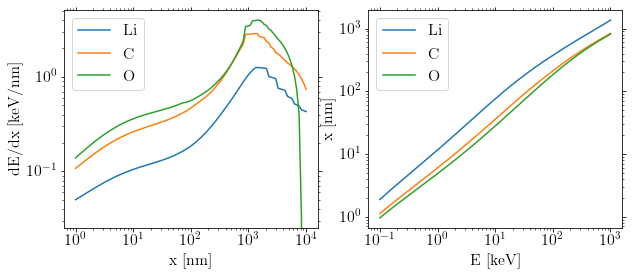

In [5]:
Zab = Mineral("Zabuyelite")
Zab.showProperties()
Zab.showSRIM()

 DMutils.py: Loading neutrino flux for the first time...
Loading neutrino fluxes for...
    DSNB
    atm
    hep
    8B
    15O
    17F
    pep
    13N
    pp
    7Be-384
    7Be-861
...done.


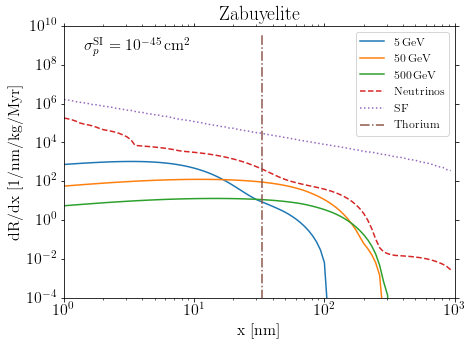

In [6]:
plotSpectrum(Zab)

### Sylvanite

Mineral name: Sylvanite
    N_nuclei: 3
    Molar mass: 859.835  g/mol
    nucleus 	*	 abun.  *	 (N_p, N_n)
 **************************************************
    Ag		*	0.0627271511394628	*	(47.0, 60.87)
    Te		*	0.5936022608988933	*	(52.0, 75.6)
    Au		*	0.3436705879616438	*	(79.0, 118.0)
Plotting SRIM data for Sylvanite:


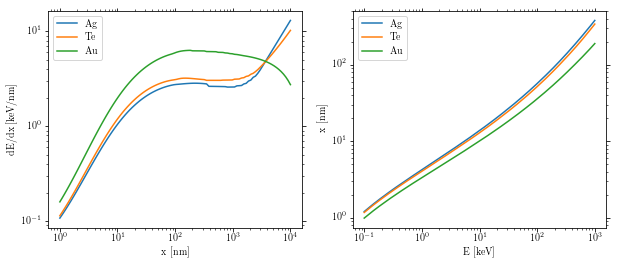

In [3]:
Syl = Mineral("Sylvanite")
Syl.showProperties()
Syl.showSRIM()

KeyboardInterrupt: 

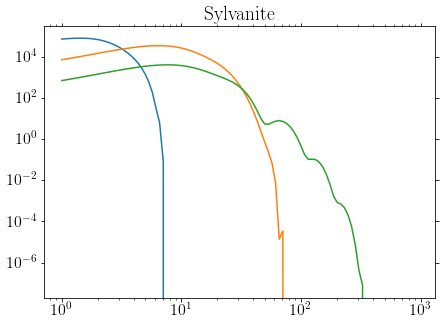

In [8]:
plotSpectrum(Syl)

### Sinjarite

Mineral name: Sinjarite
    N_nuclei: 4
    Molar mass: 146.9  g/mol
    nucleus 	*	 abun.  *	 (N_p, N_n)
 **************************************************
    Ca		*	0.2722940776038121	*	(20.0, 20.0)
    H		*	0.02722940776038121	*	(1.0, 0.0)
    Cl		*	0.48264125255275697	*	(17.0, 18.45)
    O		*	0.21783526208304968	*	(8.0, 8.0)
Plotting SRIM data for Sinjarite:


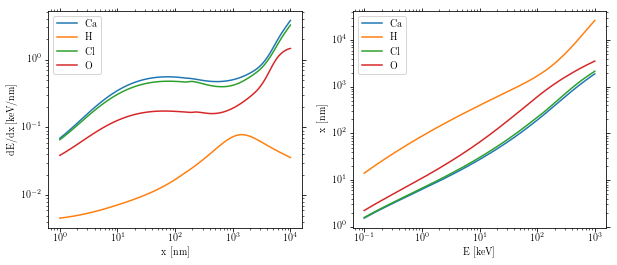

In [9]:
Sinj = Mineral("Sinjarite")
Sinj.showProperties()
Sinj.showSRIM()

In [ ]:
plotSpectrum(Sinj)

### Olivine

In [ ]:
Oliv = Mineral("Olivine")
Oliv.showProperties()
Oliv.showSRIM()

In [ ]:
plotSpectrum(Oliv)

------
## Plot binned spectra

In [10]:
dRdx_BG = paleopy.GetBackground(Syl, 15.0)

/Users/bradkav/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/bradkav/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


In [25]:
def PlotBinnedSpectra(mineral, sigma, m, dRdx_BG):
    ref_sig = 1e-45

    sig = paleopy.GetSignal(mineral, sigma, m_DM=m, xsec=ref_sig)
    
    plt.figure(figsize=(7,5))

    ax = plt.gca()

    ax.set_xscale("log")
    ax.set_yscale("log")

    BG_list = ['DSNB', 'atm', 'hep', '8B', '15O', '17F', '13N', 'pep','pp','7Be-384','7Be-861', 'SF', 'Th']
    
    #for i in range(len(dRdx_BG)):
    #    ax.step(paleopy.calcBins(sigma/2)[:-1] + sigma/4, dRdx_BG[i], label=BG_list[i])
    
    ax.step(paleopy.calcBins(sigma/2)[:-1] + sigma/4, sig, 'k:',label='DM')

    plt.xlabel("$x_T ~[\mathrm{nm}]$")
    #plt.ylabel("Information Flux [A.U.]")

    plt.title(mineral.name)

    #labtext = r'$\sigma_{x_T} = ' + str(int(sigma_x)) + '\,\mathrm{nm}; \,\,\epsilon = ' + str(int(exposure)) + '\,\mathrm{kg}\,\mathrm{Myr}$'
    #plt.text(0.05, 0.9, labtext, fontsize=16, ha='left',transform=ax.transAxes)

    plt.legend(fontsize=14,loc='lower left')

    plt.xlim(1, 1000)
    #plt.ylim(1e-2, 1e10)

    #outfile = '../plots/InfoFlux_' + mineral.name + '_exp' + str(exposure) + '_sig' + str(sigma_x) + '.pdf'

    #plt.savefig(outfile, bbox_inches="tight")

    plt.show()

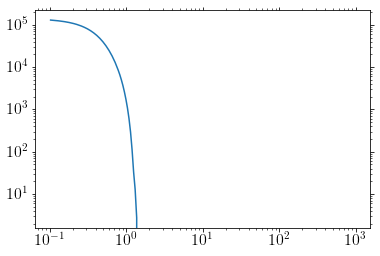

/Users/bradkav/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


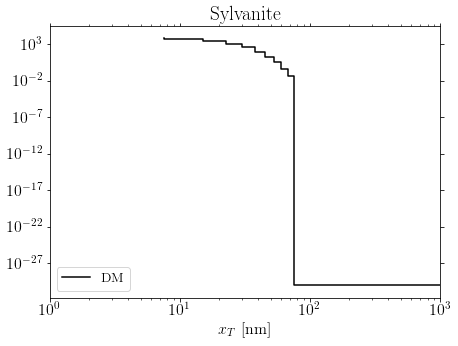

In [42]:
PlotBinnedSpectra(Syl, sigma=15.0, m=1.0, dRdx_BG=dRdx_BG)